# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [322]:
import os
import glob
import pandas as pd
os.chdir("C:/Users/USER/Desktop/Data-Analysis-Project-main") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [323]:
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))]
filenames

['Abuja_Branch.csv',
 'Combined Data.csv',
 'combined_csv.csv',
 'Lagos_Branch.csv',
 'Port_Harcourt_Branch.csv']

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [324]:
df = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
df.to_csv( "Combined Data.csv", index=False, encoding='utf-8-sig')

#### To-Do -Read the CSV file using `pd.read_csv` method

In [325]:
data=pd.read_csv("Combined Data.csv")

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [327]:
data.head(6)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4
5,371-85-5789,B,Abuja,Normal,Male,Health and beauty,31672.8,3,4750.92,99769.32,3/5/2019,10:40,Epay,95018.4,4.761905,4750.92,5.1


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [328]:
print ("The shape of the data is: ", data.shape)

The shape of the data is:  (1000, 17)


#### To-Do - Generate the names of the columns using the columns attribute.

In [329]:
print ("The columns in the dataset are: \n \n", data.columns)

The columns in the dataset are: 
 
 Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [330]:
print ("The general Statistical Summary of our dataset is: \n ")
data.describe()

The general Statistical Summary of our dataset is: 
 


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [331]:
print ("The data does not contain any missing values.\n")
print ("Proof:")
data.isnull().sum()

The data does not contain any missing values.

Proof:


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [333]:
data['Date']=pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['Time'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [334]:
data.dtypes #Observe the Data Type of Date and Time
print ('The data type for the Date Column is: ',data['Date'].dtype)

The data type for the Date Column is:  datetime64[ns]


#### To-Do - Repeat the two steps above to the `time` column

In [335]:
print ('The data type for the Time Column is: ',data['Time'].dtype)

The data type for the Time Column is:  datetime64[ns]


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [336]:
data['Day']=pd.DatetimeIndex(data['Date']).day_name()
data['Day'].head()

0    Wednesday
1    Wednesday
2     Saturday
3      Tuesday
4       Monday
Name: Day, dtype: object

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [337]:
data['Month']=pd.DatetimeIndex(data['Date']).month_name()
data['Month'].head()

0    February
1    February
2       March
3     January
4       March
Name: Month, dtype: object

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [338]:
data['Year']=pd.DatetimeIndex(data['Date']).year
data['Year'].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: int64

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [339]:
data['Hour']=pd.DatetimeIndex(data['Time']).hour
data['Hour'].head()

0    13
1    18
2    17
3    16
4    15
Name: Hour, dtype: int64

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [340]:
print ("There are {} unique hours and they are: {}  \n".format(data['Hour'].nunique(), data['Hour'].unique()))

There are 11 unique hours and they are: [13 18 17 16 15 10 12 19 14 11 20]  



In [341]:
print (data['Hour'].unique())

[13 18 17 16 15 10 12 19 14 11 20]


## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [347]:
#Uncomment the code and Run it
categorical_columns = [col for col in data.columns if data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment',
 'Day',
 'Month']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [343]:
#Example - Uncomment the Code and Run it
data['Branch'].unique().tolist()

['B', 'A', 'C']

In [344]:
print("Total Number of unique values in the Branch Column : {}". format(len(data['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [349]:
#data['Invoice ID'].unique().tolist()
#print("Total Number of unique values in the Branch Column : {}". format(len(data['Invoice ID'].unique().tolist())))
#Invoice ID was commented out because it is not a categorical variable.

data['City'].unique().tolist()
print("Total Number of unique values in the City Column : {}". format(len(data['City'].unique().tolist())))

data['Customer type'].unique().tolist()
print("Total Number of unique values in the Customer type Column : {}". format(len(data['Customer type'].unique().tolist())))

data['Gender'].unique().tolist()
print("Total Number of unique values in the Gender Column : {}". format(len(data['Gender'].unique().tolist())))

data['Product line'].unique().tolist()
print("Total Number of unique values in the Product line Column : {}". format(len(data['Product line'].unique().tolist())))

data['Payment'].unique().tolist()
print("Total Number of unique values in the Payment Column : {}". format(len(data['Payment'].unique().tolist())))

data['Day'].unique().tolist()
print("Total Number of unique values in the Day Column : {}". format(len(data['Day'].unique().tolist())))

data['Month'].unique().tolist()
print("Total Number of unique values in the Month Column : {}". format(len(data['Month'].unique().tolist())))

Total Number of unique values in the City Column : 3
Total Number of unique values in the Customer type Column : 2
Total Number of unique values in the Gender Column : 2
Total Number of unique values in the Product line Column : 6
Total Number of unique values in the Payment Column : 3
Total Number of unique values in the Day Column : 7
Total Number of unique values in the Month Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [350]:
data['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [351]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [352]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [353]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [354]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [355]:
data['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [253]:
cityGroupMean=data.groupby(["City"]).mean()
cityGroupMean

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,Year,Hour
City,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,2019.0,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,2019.0,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,2019.0,2019.0,14.920732


In [254]:
cityGroupSum=data.groupby(['City']).sum()
cityGroupSum

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,Year,Hour
City,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,670308,670308,5029
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,686460,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,662232,662232,4894


#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [271]:
incomeGroupMax=data.groupby('City')['gross income'].max()
incomeGroupMax

City
Abuja            17528.4
Lagos            17816.4
Port Harcourt    17874.0
Name: gross income, dtype: float64

In [270]:
priceGroupMax=data.groupby('City')['Unit price'].max()
incomeGroupMax

City
Abuja            10
Lagos            10
Port Harcourt    10
Name: Quantity, dtype: int64

In [269]:
quantityGroupMax=data.groupby('City')['Quantity'].max()
incomeGroupMax

City
Abuja            10
Lagos            10
Port Harcourt    10
Name: Quantity, dtype: int64

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

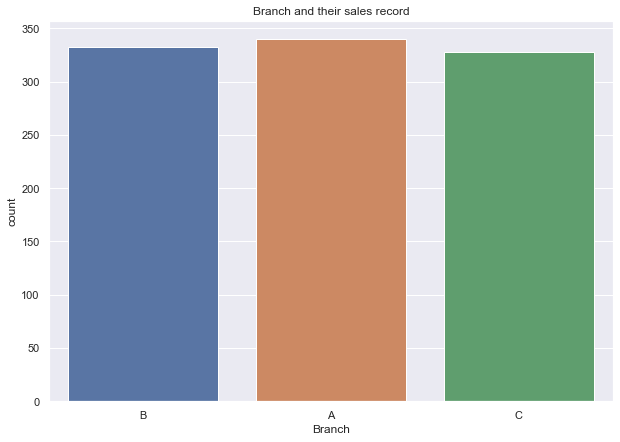

In [290]:
sns.set(rc={'figure.figsize':(9,7)})
import seaborn as sns
plot=sns.countplot(x=data['Branch'])
plt.title("Branch and their sales record")
plt.show()

#### Explore a countplot for the `Payment` and `City` Column

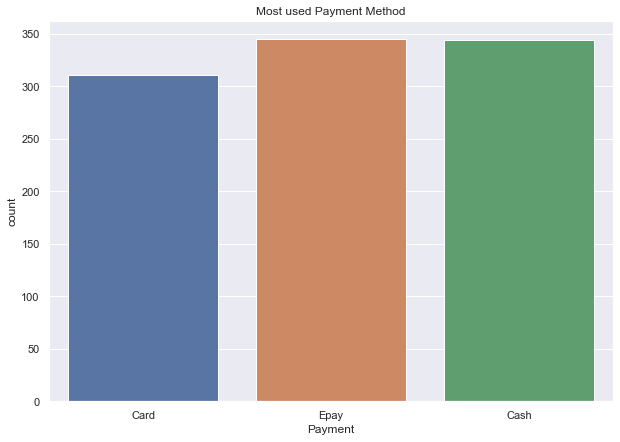

In [202]:
sns.set(rc={'figure.figsize':(9,7)})
import seaborn as sns
plot=sns.countplot(x=data['Payment'])
plt.title("Most used Payment Method")
plt.show()

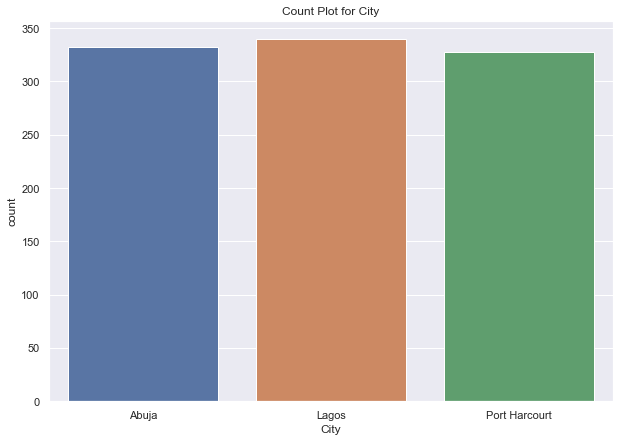

In [288]:
sns.set(rc={'figure.figsize':(9,7)})
import seaborn as sns
plot=sns.countplot(x=data['City'])
plt.title("Count Plot for City")
plt.show()


#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

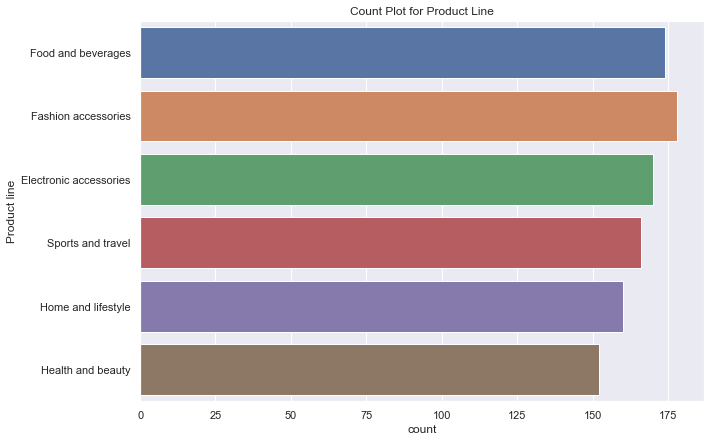

In [197]:
sns.set(rc={'figure.figsize':(9,7)})
plot=sns.countplot(y=data['Product line'])
plt.title("Count Plot for Product Line")
plt.show()

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

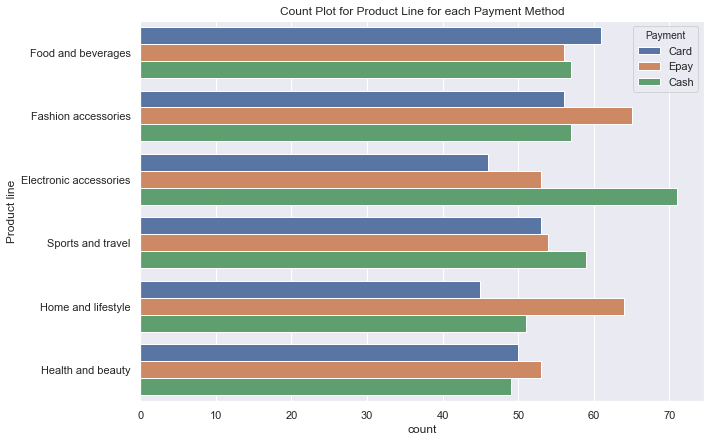

In [207]:
sns.set(rc={'figure.figsize':(9,7)})
plot=sns.countplot(y=data['Product line'], hue=data['Payment'])
plt.title("Count Plot for Product Line for each Payment Method")
plt.show()

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

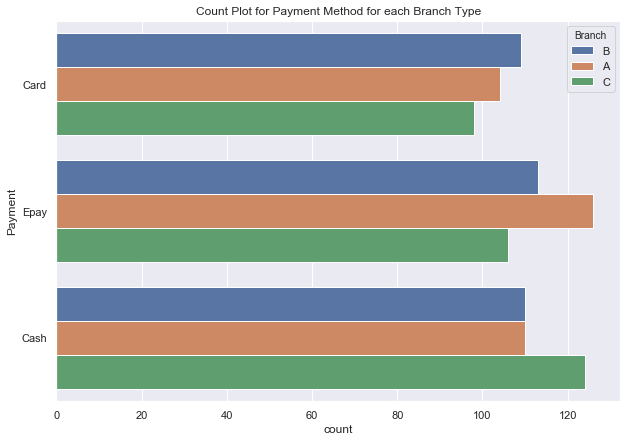

In [208]:
sns.set(rc={'figure.figsize':(9,7)})
plot=sns.countplot(y=data['Payment'], hue=data['Branch'])
plt.title("Count Plot for Payment Method for each Branch Type")
plt.show()

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

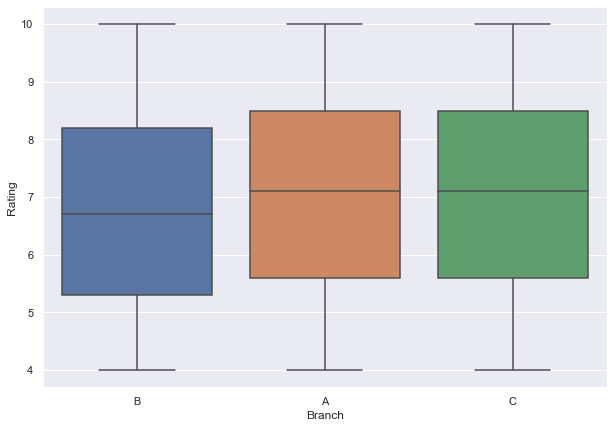

In [210]:
sns.boxplot(x=data['Branch'], y=data['Rating'])

In [211]:
print ("Branch B has the lowest rating")

Branch B has the lowest rating


#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

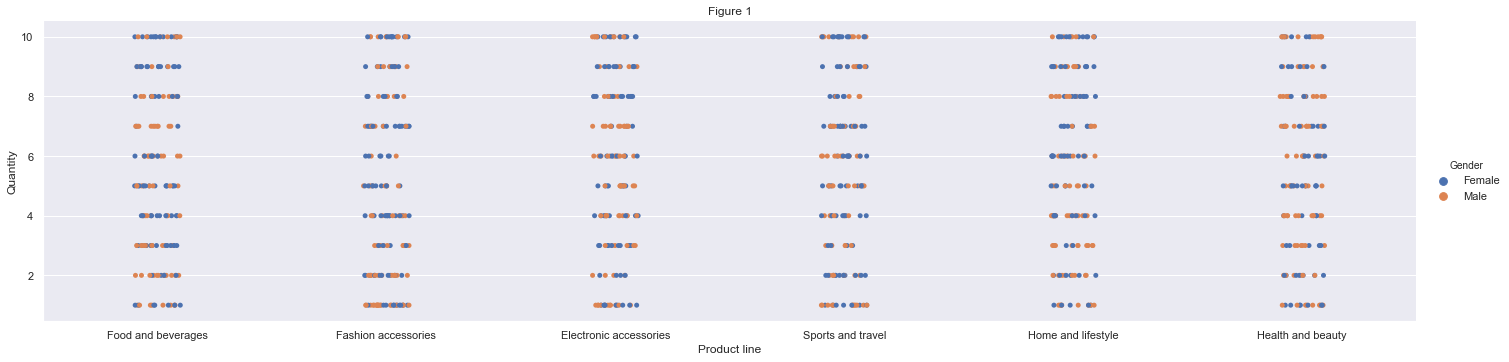

In [238]:
sns.catplot(x="Product line",y="Quantity",hue="Gender", data=data, aspect=4)
plt.title("Figure 1")
plt.show()

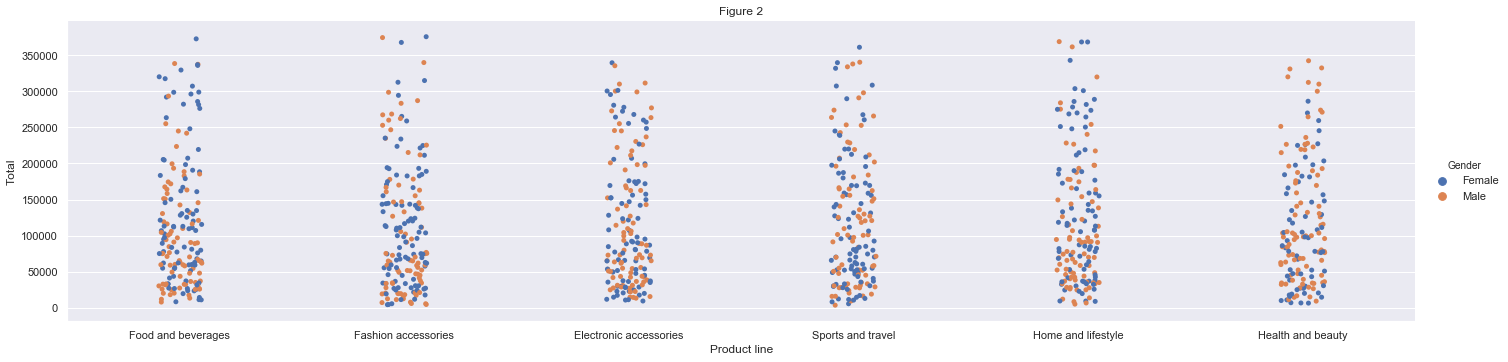

In [237]:
sns.catplot(x="Product line",y="Total",hue="Gender", data=data, aspect=4)
plt.title("Figure 2")
plt.show()

<h6> Observation: </h6> For Figure 2, we will notice the scattered dots increasing with respect to Total, whereas Figure 1 shows straight lines at each point. This is because, Quanitity is a discrete variable. A catplot might not be an efficient chart to illustrate in this case, whereas, Total is a continuous variable. Figure 2 is tightly compacted at the bottom and spatial towards the higher point of the visualization

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

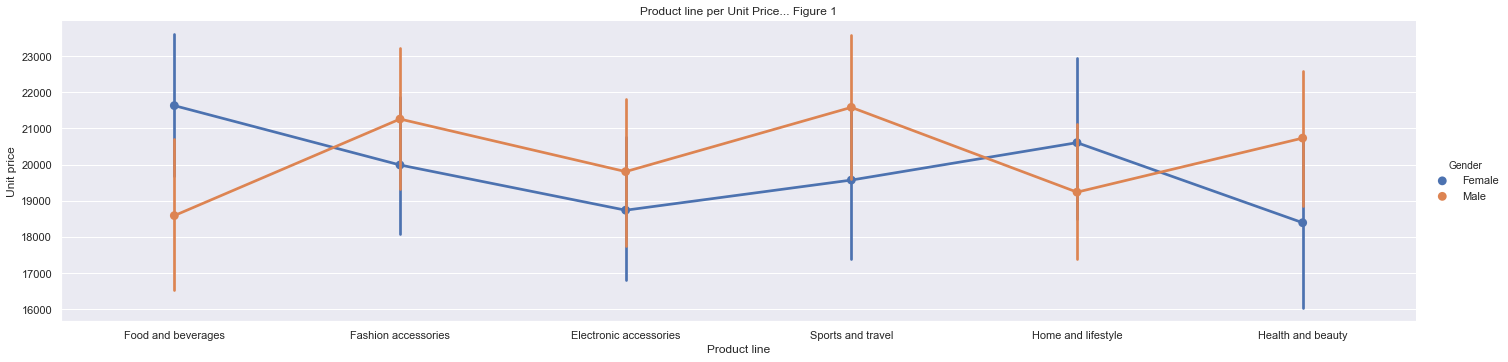

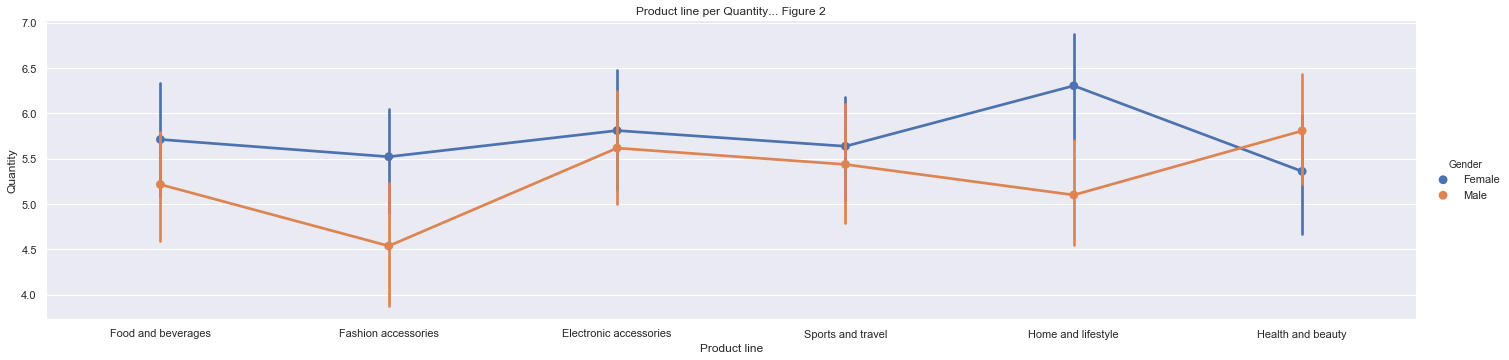

In [248]:
sns.catplot(x="Product line",y="Unit price",hue="Gender", data=data, aspect=4, kind="point")
plt.title("Product line per Unit Price... Figure 1")

sns.catplot(x="Product line",y="Quantity",hue="Gender", data=data, aspect=4, kind="point")
plt.title("Product line per Quantity... Figure 2")
plt.show()

By applying the kind parameter and passing the point argument, we will realize that Figure 1 and Figure 2 look somewhat similar with just lines and points to represent the data rather than the previous scatter diagram. It is now easier to understand Figure 2

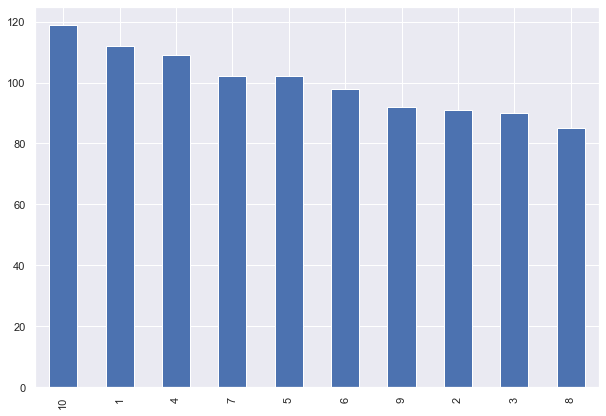

In [320]:
data['Quantity'].value_counts().plot(kind='bar')
# Based on this plot, we can see graphically that value counts of each Quantity using Matplotlib's bar graph.

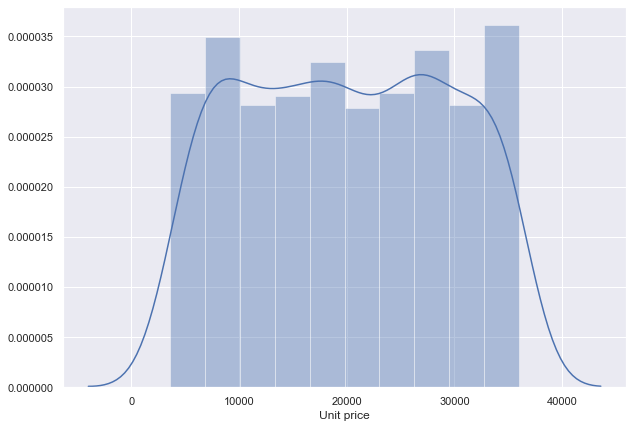

In [319]:
sns.distplot(data['Unit price'])

#The seaborn's dist plot enables us to see the shape of the continuous variable in our dataset. 
#Based on the figure below, the variable is not normally distributed

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 